In [1]:
# Importing Libraries

import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Others
import datetime


In [2]:
#Loading the dataset
df = pd.read_csv("Product Demand.csv")
df.head(5)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0965,St john's,Category_006,2014-01-08,2.0
1,Product_1724,St john's,Category_003,2014-05-31,108.0
2,Product_1521,Surrey,Category_019,2014-06-24,85000.0
3,Product_1521,Surrey,Category_019,2014-06-24,7000.0
4,Product_1507,Oshawa,Category_019,2014-09-02,1250.0


In [3]:
#checking datatypes and counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Product_Code      1048575 non-null  object 
 1   Warehouse         1048575 non-null  object 
 2   Product_Category  1048575 non-null  object 
 3   Date              1037336 non-null  object 
 4   Order_Demand      1048575 non-null  float64
dtypes: float64(1), object(4)
memory usage: 40.0+ MB


In [4]:
# Check columns for missing values and return the number of NaN in each column
missing_values = df.isnull().sum()
print(missing_values)

# Calculate the percentage of missing data in the entire DataFrame
percentage_missing = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100

# Print the result
print("% of Data missing =", percentage_missing)

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64
% of Data missing = 0.21436711727821092


The percentage of missing values is less than 1% of the data do we can drop the missing values

In [5]:
#dropping the missing values
df.dropna(axis=0, how="any", inplace=True)

# Check for missing values in the cleaned DataFrame
missing_values_after_cleanup = df.isnull().sum()

# Print the result
print("Number of missing values after cleaning:")
print(missing_values_after_cleanup)


Number of missing values after cleaning:
Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64


In [6]:
# Convert the 'Date' column to the required format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0965,St john's,Category_006,2014-01-08,2.0
1,Product_1724,St john's,Category_003,2014-05-31,108.0
2,Product_1521,Surrey,Category_019,2014-06-24,85000.0
3,Product_1521,Surrey,Category_019,2014-06-24,7000.0
4,Product_1507,Oshawa,Category_019,2014-09-02,1250.0


In [7]:
#checking the distribution of the dataset
df.describe(include='all')

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1037336,1037336,1037336,1035585,1.037336e+06
unique,2157,4,33,NaN,NaN
top,Product_1359,Brampton,Category_019,NaN,NaN
freq,17048,763209,470308,NaN,NaN
mean,NaN,NaN,NaN,2017-06-16 21:32:17.364099072,4.443805e+03
min,NaN,NaN,NaN,2014-01-08 00:00:00,-1.631813e+05
25%,NaN,NaN,NaN,2016-04-05 00:00:00,1.800000e+01
50%,NaN,NaN,NaN,2017-06-10 00:00:00,3.000000e+02
75%,NaN,NaN,NaN,2018-08-25 00:00:00,2.000000e+03
max,NaN,NaN,NaN,2019-12-30 00:00:00,4.000000e+06


Here we can see that there are negative values in order demand which is not possible, so converting them to positive.

In [8]:
# Convert negative Order_Demand values to positive
df['Order_Demand'] = df['Order_Demand'].abs()

#Checking for outliers in Order_Demand by using Z-score method
z_scores = (df['Order_Demand'] - df['Order_Demand'].mean()) / df['Order_Demand'].std()
threshold = 3
outliers = df[np.abs(z_scores) > threshold]

# Calculate the percentage of outliers
percentage_outliers = (len(outliers) / len(df)) * 100

print("Percentage of outliers:", percentage_outliers)


Percentage of outliers: 1.1094765823224104


In [9]:
# droping the outliers from the DataFrame
df = df[np.abs(z_scores) <= threshold]

In [10]:
#Dropping duplicates
df = df.drop_duplicates()

In [11]:
#Checking for missing values
df.isna().sum()
df = df.dropna()

In [12]:
df = df.sort_values(by=['Date', 'Product_Code'])
df = df.set_index('Date')
df.head()

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2014-01-08,Product_0965,St john's,Category_006,2.0
2014-05-31,Product_1724,St john's,Category_003,108.0
2014-06-24,Product_1521,Surrey,Category_019,85000.0
2014-06-24,Product_1521,Surrey,Category_019,7000.0
2014-09-02,Product_1507,Oshawa,Category_019,1250.0


In [13]:
# Check the minimum and maximum dates
min_date = df.index.min()
max_date = df.index.max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Minimum Date: 2014-01-08 00:00:00
Maximum Date: 2019-12-30 00:00:00


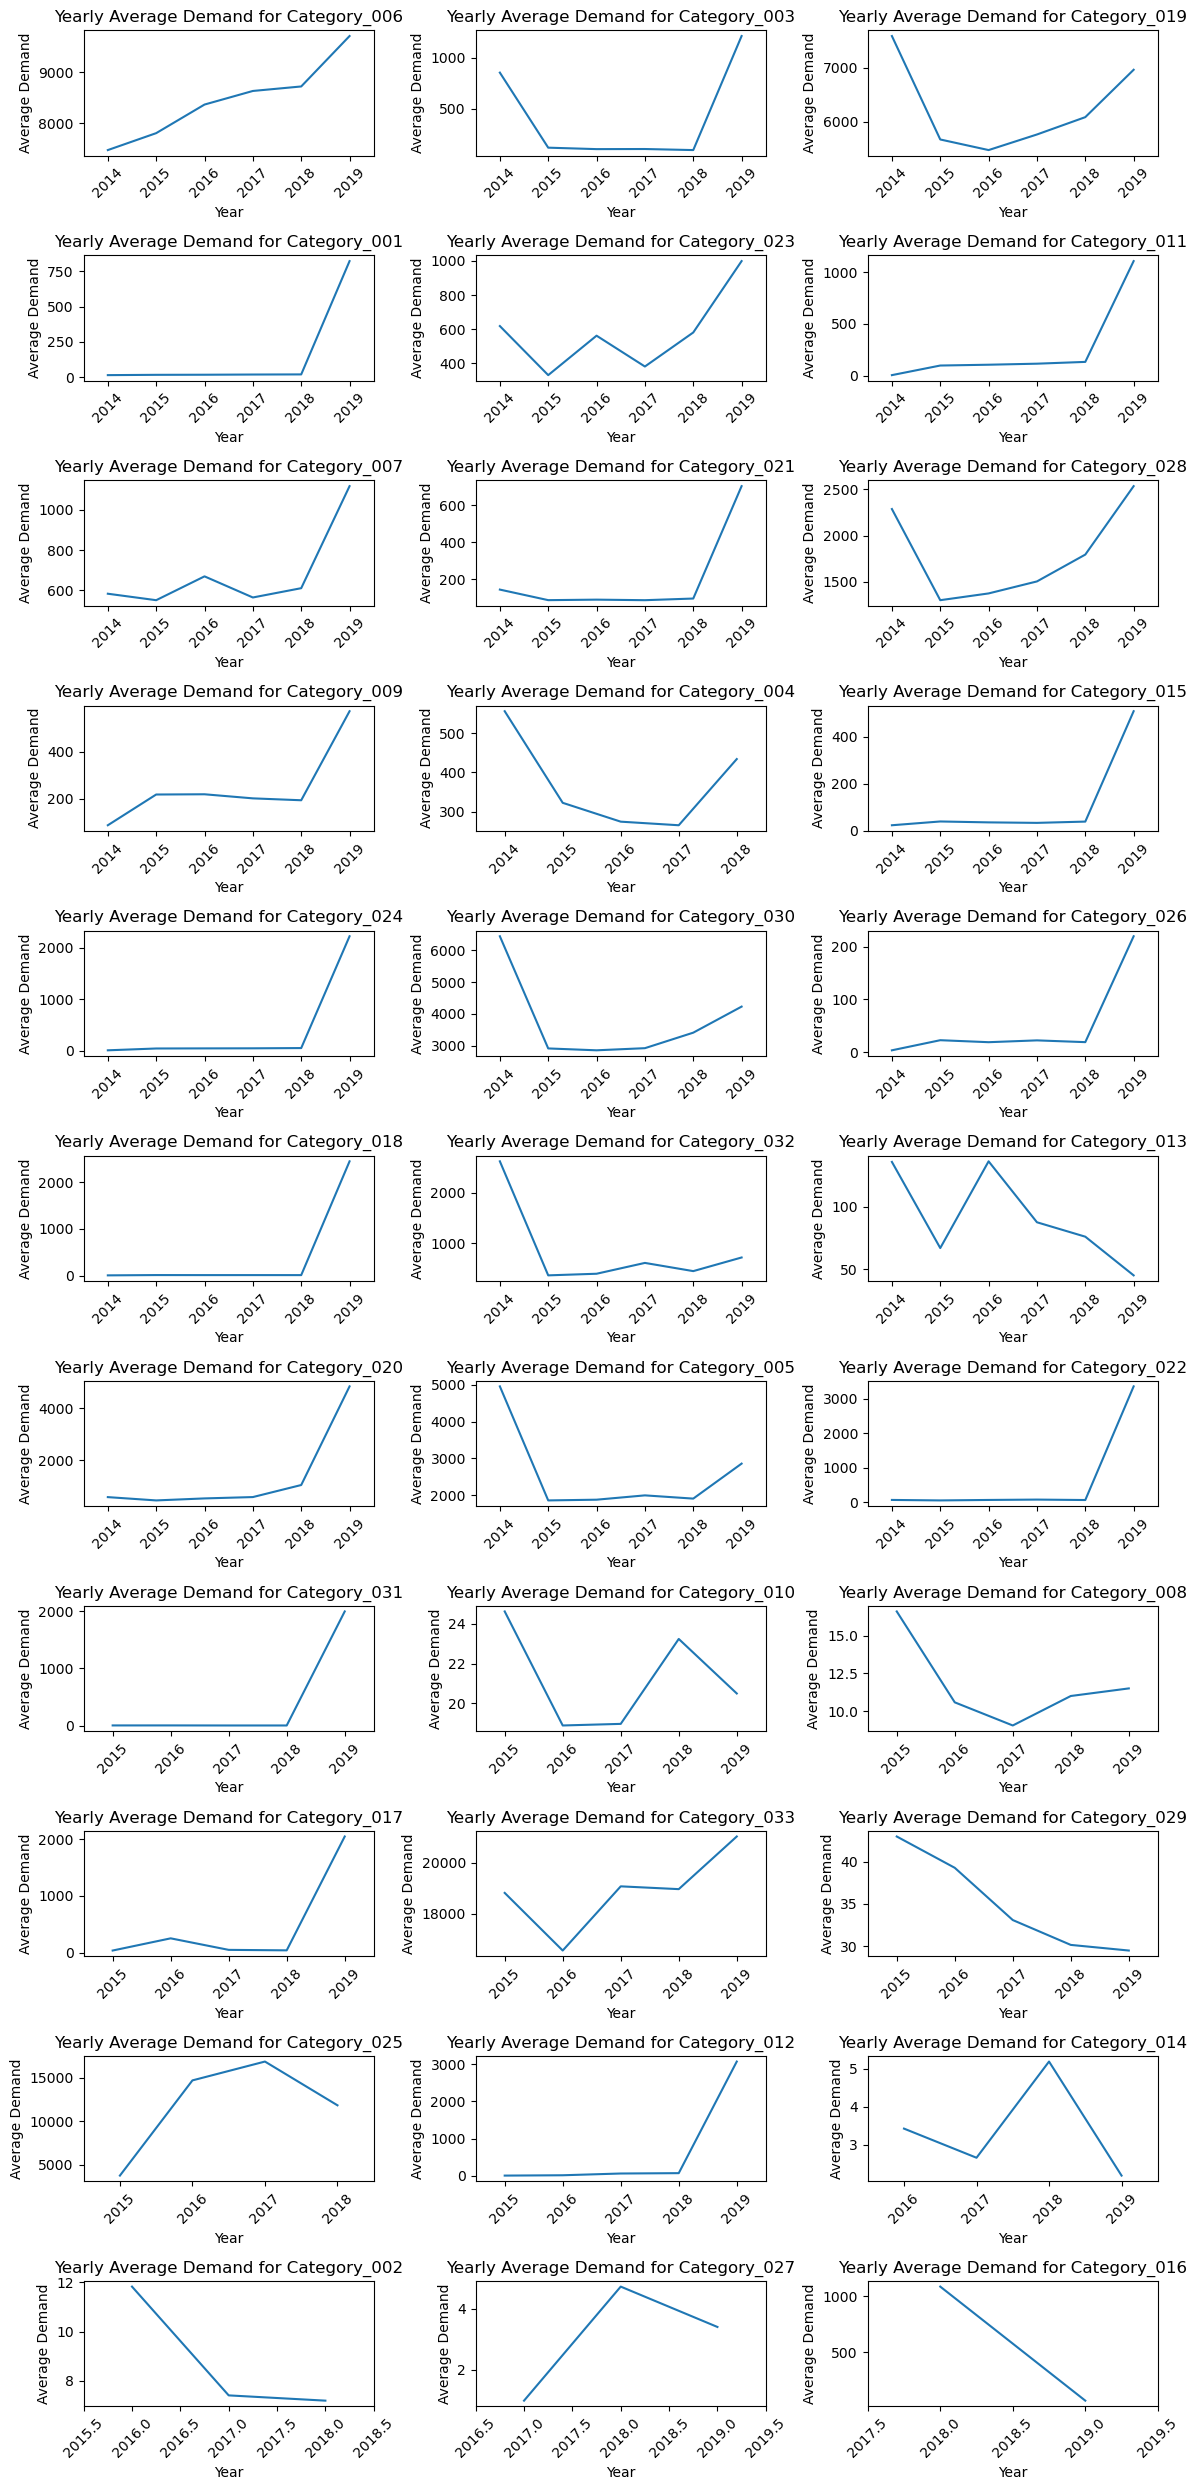

In [14]:
# Calculate yearly average demand for each category
category_yearly_average_demand = df.groupby([df.index.year, 'Product_Category'])['Order_Demand'].mean()
unique_categories = df['Product_Category'].unique()
# Determine the number of rows and columns for subplots
num_cols = 3
num_rows = 11

# Plotting
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 25))

for i, category in enumerate(unique_categories):
    row = i // num_cols
    col = i % num_cols
    category_data = category_yearly_average_demand[:, category]
    ax = axs[row, col] if num_rows > 1 else axs[col]
    ax.plot(category_data.index, category_data.values, linestyle='-')
    ax.set_title(f"Yearly Average Demand for {category}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Average Demand")
    ax.xaxis.set_tick_params(rotation=45)  # Rotate x-axis labels for better visibility
    ax.set_xlim(category_data.index.min() - 0.5, category_data.index.max() + 0.5)  # Expand x-axis limits slightly
    ax.grid(False)  # Hide gridlines

# Hide empty subplots
for i in range(33, num_rows*num_cols):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()


C:\Users\14317\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\14317\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\14317\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Warehouse', ylabel='count'>

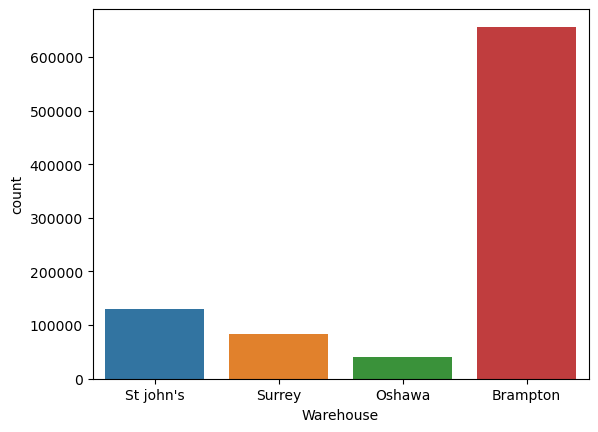

In [15]:
# Find the aggregate demand among the warehouses
sns.countplot(x = 'Warehouse', data = df)

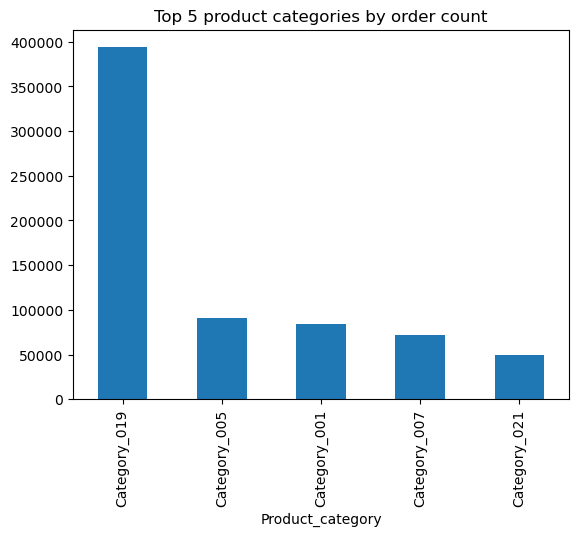

In [16]:
# Plot the 5 most popular category
df.Product_Category.value_counts().head(5).plot(kind = 'bar')
plt.xlabel('Product_category')
plt.title("Top 5 product categories by order count")
plt.show()

In [17]:
# Group by 'Product_Category' and calculate the sum of 'Order_Demand', then sort in descending order
product_category_demand = df.groupby('Product_Category')['Order_Demand'].sum().sort_values(ascending=False)

# Create a DataFrame with the total demand and percentage contribution
df1 = pd.DataFrame(product_category_demand)
df1["% Contribution"] = df1['Order_Demand'] / df1['Order_Demand'].sum() * 100

# Print the result
print("Total Order Demand by Product Category and % Contribution:")
print(df1)


Total Order Demand by Product Category and % Contribution:
                  Order_Demand  % Contribution
Product_Category                              
Category_019      2.349846e+09       76.910679
Category_006      2.754795e+08        9.016469
Category_005      1.902435e+08        6.226685
Category_007      4.976323e+07        1.628755
Category_028      4.846382e+07        1.586225
Category_030      4.101063e+07        1.342282
Category_033      3.034672e+07        0.993251
Category_001      1.534765e+07        0.502330
Category_021      9.552659e+06        0.312659
Category_024      8.059681e+06        0.263794
Category_011      5.822526e+06        0.190572
Category_009      5.293992e+06        0.173273
Category_022      4.436797e+06        0.145217
Category_032      4.418753e+06        0.144626
Category_023      4.143096e+06        0.135604
Category_015      2.620925e+06        0.085783
Category_018      2.433251e+06        0.079641
Category_020      2.335175e+06        0.076430
C

Here, Total order demand by product category reveals that 'Category_019' dominates with approximately 77% of the total demand, followed by 'Category_006' with 9%. The top five categories contribute significantly to the overall order demand, providing insights into the distribution of demand across different product categories.

<Axes: title={'center': 'Total Order demand by warehouses '}, xlabel='Sum of the demand in (000000s)', ylabel='Warehouse'>

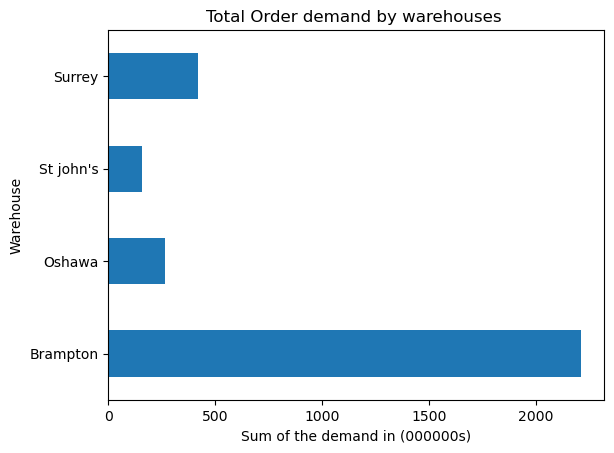

In [18]:
# Total Demand by Warehouse
warehouse_Demand = df.groupby('Warehouse')['Order_Demand'].sum().div(1000000)
warehouse_Demand
warehouse_Demand.plot(kind = 'barh', xlabel = 'Sum of the demand in (000000s)',title = "Total Order demand by warehouses ")

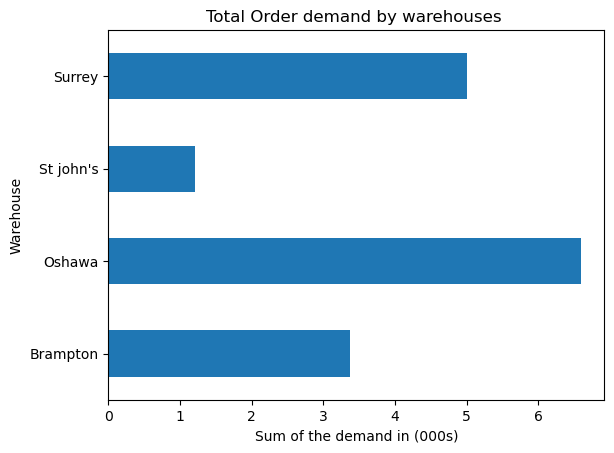

In [19]:
# Average Demand by Warehouse
df.groupby('Warehouse')['Order_Demand'].mean().div(1000).plot(kind = 'barh', xlabel = 'Sum of the demand in (000s)',title = "Total Order demand by warehouses ")
plt.show()

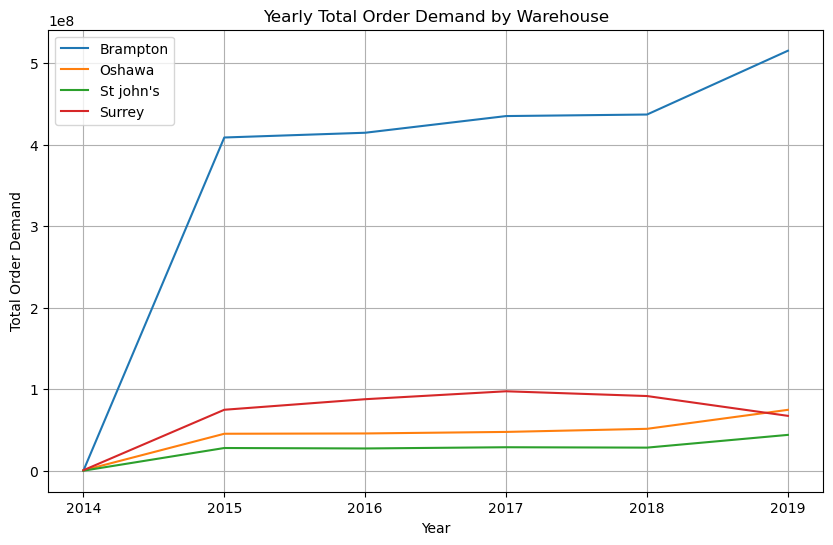

In [20]:
# Calculate yearly total order demand for each warehouse
warehouse_yearly_total_demand = df.groupby([df.index.year, 'Warehouse'])['Order_Demand'].sum()

# Plotting
plt.figure(figsize=(10, 6))

for warehouse, data in warehouse_yearly_total_demand.groupby('Warehouse'):
    plt.plot(data.index.get_level_values(0), data.values, label=warehouse)

plt.title("Yearly Total Order Demand by Warehouse")
plt.xlabel("Year")
plt.ylabel("Total Order Demand")
plt.legend()
plt.grid(True)
plt.show()

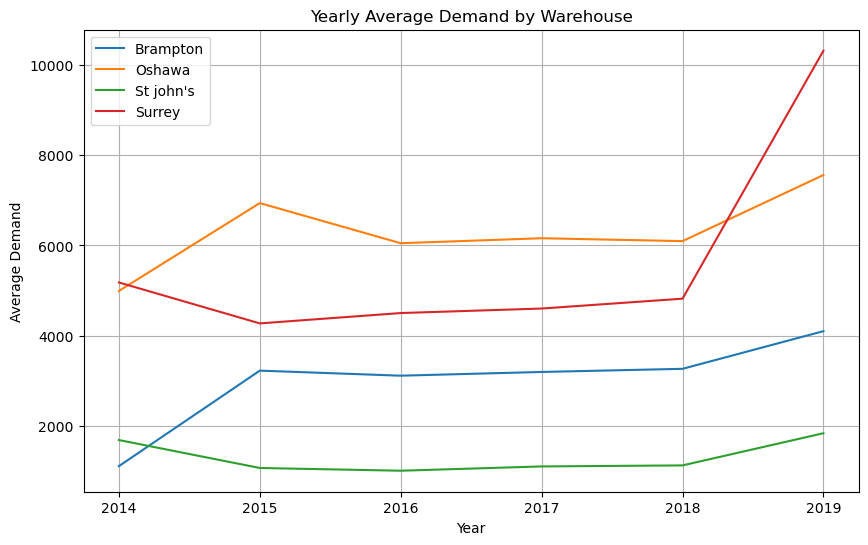

In [21]:
# Calculate yearly average demand for each warehouse
warehouse_yearly_average_demand = df.groupby([df.index.year, 'Warehouse'])['Order_Demand'].mean()

# Plotting
plt.figure(figsize=(10, 6))

for warehouse, data in warehouse_yearly_average_demand.groupby('Warehouse'):
    plt.plot(data.index.get_level_values(0), data.values, label=warehouse)

plt.title("Yearly Average Demand by Warehouse")
plt.xlabel("Year")
plt.ylabel("Average Demand")
plt.legend()
plt.grid(True)
plt.show()

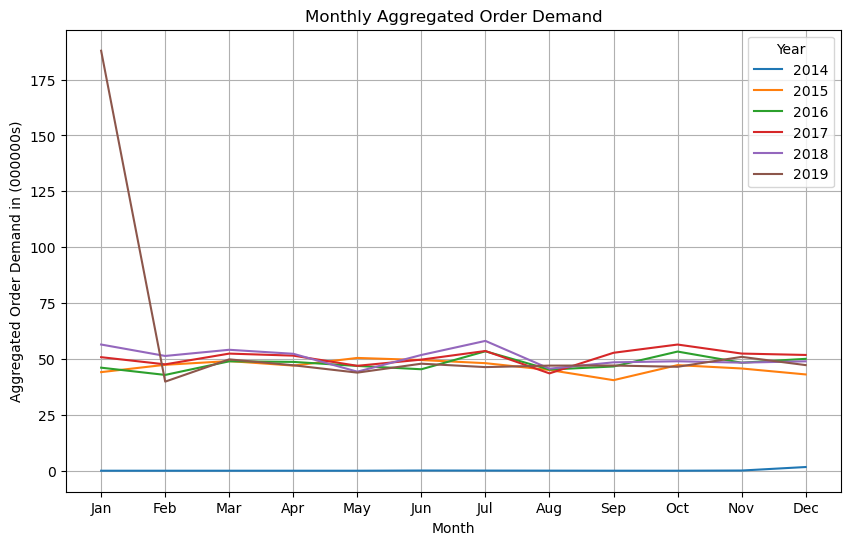

In [22]:
# Aggregate order demand by month and year
monthly_demand = df.groupby([df.index.year, df.index.month]).sum()

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over years
for year, data in monthly_demand.groupby(level=0):
    plt.plot(data.index.get_level_values(1), data['Order_Demand'].div(1000000), label=year)

plt.title("Monthly Aggregated Order Demand")
plt.xlabel("Month")
plt.ylabel("Aggregated Order Demand in (000000s)")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()

C:\Users\14317\AppData\Local\Temp\ipykernel_7648\760032527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat019['Date']=df_cat019.index
C:\Users\14317\AppData\Local\Temp\ipykernel_7648\760032527.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat019['Year'] = df_cat019['Date'].dt.year


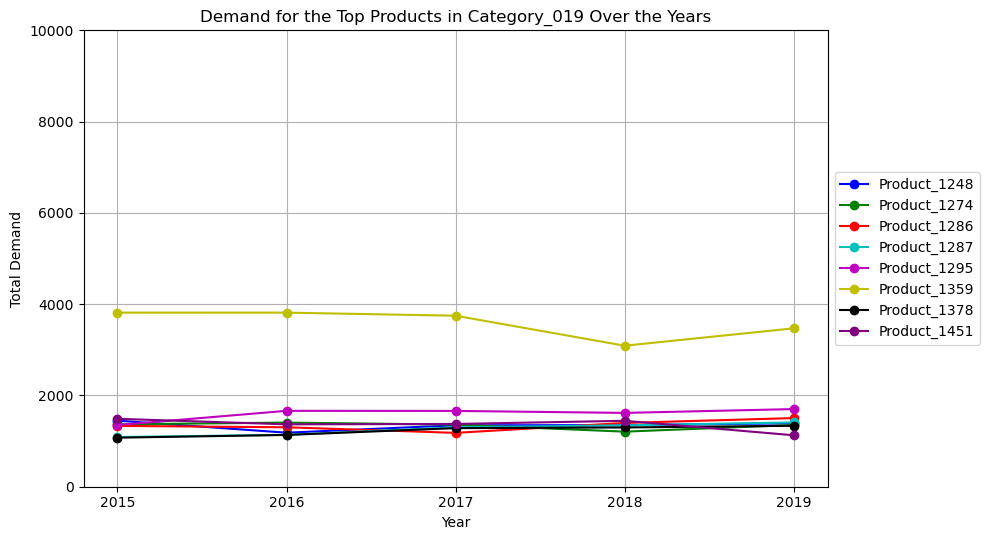

In [24]:
# Calculate the sum of positive demand for each Product_ID in Category_019
df_cat019 = df[df['Product_Category'] == 'Category_019']
df_cat019['Date']=df_cat019.index
df_cat019['Year'] = df_cat019['Date'].dt.year
product_demand_grouped = df_cat019.groupby('Product_Code')['Order_Demand'].sum()

# Select the top 8 products based on their demand
top_products = product_demand_grouped.nlargest(8)

# Filter the data for the top products
top_products_data = df_cat019[df_cat019['Product_Code'].isin(top_products.index)]

# Group the top products data by 'Year' and 'Product_ID', and calculate the sum of positive demand
product_yearly_grouped = top_products_data.groupby(['Year', 'Product_Code'])['Order_Demand'].sum().unstack()

# Scale the figures down by 10,000 for better visualization
scaled_product_yearly_grouped = product_yearly_grouped.div(10000)

# Plot demand for each of the top products over the years with different colors
plt.figure(figsize=(10, 5.5))

# Define a list of colors for each Product_ID
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple']

# Iterate through each Product_ID and plot the demand with different colors
for i, product_id in enumerate(scaled_product_yearly_grouped.columns):
    plt.plot(scaled_product_yearly_grouped.index, scaled_product_yearly_grouped[product_id], label=product_id, color=colors[i], marker='o')

# Add labels and legend for better interpretation
plt.title('Demand for the Top Products in Category_019 Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Demand')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0, 10000)
plt.xticks(scaled_product_yearly_grouped.index.unique())
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [25]:
# Filtering the data for Product_1359
df_product_1359 = df_cat019[df_cat019['Product_Code'] == 'Product_1359']

# Extracting the year and month from the 'Date' column
df_product_1359['Time'] = df_product_1359['Date'].dt.strftime('%Y-%m')

# Converting the 'Time' column into pandas datetime
df_product_1359['Time'] = pd.to_datetime(df_product_1359['Time'])

# Grouping the data by Time, and aggregating by positive demand
df_product_1359_grouped = df_product_1359.groupby('Time')['Order_Demand'].sum()

# Scaling the figures down by 1,000,000 (i.e., a million)
df_product_1359_grouped_div = df_product_1359_grouped.div(1000000)

C:\Users\14317\AppData\Local\Temp\ipykernel_7648\186557073.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product_1359['Time'] = df_product_1359['Date'].dt.strftime('%Y-%m')
C:\Users\14317\AppData\Local\Temp\ipykernel_7648\186557073.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product_1359['Time'] = pd.to_datetime(df_product_1359['Time'])


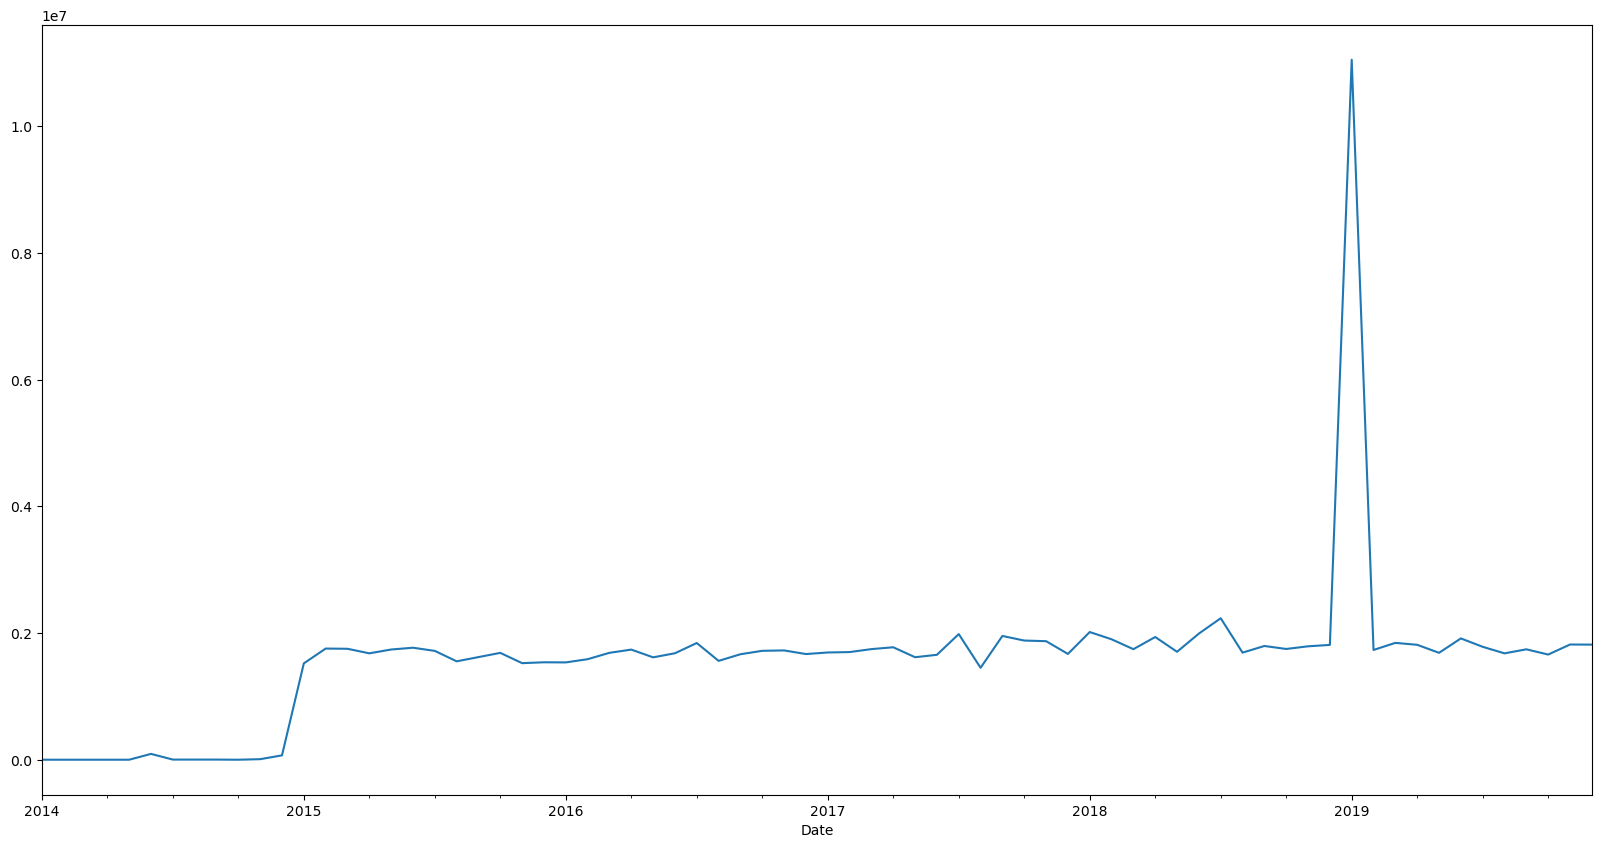

In [26]:
#Exploring the Data as TIME SERIES
#Step-01: Lets calculate the Total  Order Qty placed on by Each Day
df1=df.groupby('Date')['Order_Demand'].sum().reset_index()
#Step-02: Indexing the Date Column as for further procssing.
df1 = df1.set_index('Date')
df1.index #Lets check the index
#Step-03:#Averages daily sales value for the month, and we are using the start of each month as the timestamp.
monthly_avg_sales = df1['Order_Demand'].resample('MS').mean()
#In case there are Null values, they can be imputed using bfill.
monthly_avg_sales = monthly_avg_sales.fillna(monthly_avg_sales.bfill())
#Visualizing time series.

monthly_avg_sales.plot(figsize=(20,10))
plt.show()

In [27]:
# Filtering the data for Product_1359
df_cat019 = df_cat019[df_cat019['Warehouse'] == 'Brampton']
df_product_1359 = df_cat019[df_cat019['Product_Code'] == 'Product_1359']

# Extracting the year and month from the 'Date' column
df_product_1359['Time'] = df_product_1359['Date'].dt.strftime('%Y-%m')

# Converting the 'Time' column into pandas datetime
df_product_1359['Time'] = pd.to_datetime(df_product_1359['Time'])

# Grouping the data by Time, and aggregating by positive demand
df_product_1359_grouped = df_product_1359.groupby('Time')['Order_Demand'].sum()

# Scaling the figures down by 1,000,000 (i.e., a million)
df_product_1359_grouped_div = df_product_1359_grouped.div(1000000)

C:\Users\14317\AppData\Local\Temp\ipykernel_7648\406157513.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product_1359['Time'] = df_product_1359['Date'].dt.strftime('%Y-%m')
C:\Users\14317\AppData\Local\Temp\ipykernel_7648\406157513.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product_1359['Time'] = pd.to_datetime(df_product_1359['Time'])


In [28]:
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots
from sklearn.model_selection import train_test_split

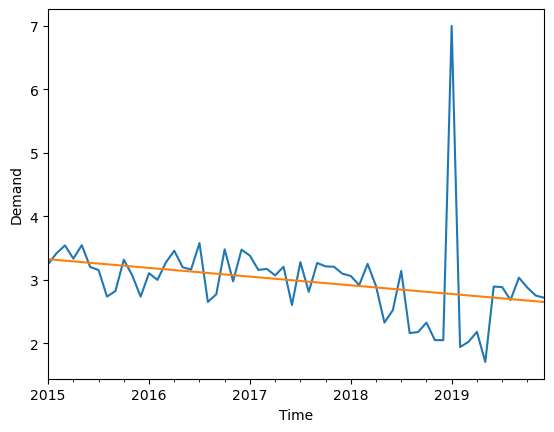

In [29]:
# Create time series
demand_ts = pd.Series(df_product_1359_grouped_div.values, index=df_product_1359_grouped_div.index, name='Demand')
demand_ts.index = pd.DatetimeIndex(demand_ts.index, freq=demand_ts.index.inferred_freq)
# fit a linear trend model to the time series
demand_df = tsatools.add_trend(demand_ts, trend='ct')
demand_lm = sm.ols(formula='Demand ~ trend', data=demand_df).fit()
# plot the time series
ax = demand_ts.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Demand')
demand_lm.predict(demand_df).plot(ax=ax)
plt.show()

In [30]:
# Split the data into train and validation sets
train_df, valid_df = train_test_split(demand_df, test_size=0.2, shuffle=False)

# fit a linear model using the training set and predict on the validation set
demand_lm = sm.ols(formula='Demand ~ trend', data=train_df).fit()
predict_df = demand_lm.predict(valid_df)

In [31]:
def singleGraphLayout(ax, ylim, train_df, valid_df):
    ax.set_ylim(*ylim)
    ax.set_xlabel('Time')
    one_month = pd.Timedelta('31 days')
    xtrain = (min(train_df.index), max(train_df.index) - one_month)
    xvalid = (min(valid_df.index) + one_month, max(valid_df.index) - one_month)
    xtv = xtrain[1] + 0.5 * (xvalid[0] - xtrain[1])
    ypos = 0.9 * ylim[1] + 0.1 * ylim[0]
    ax.add_line(plt.Line2D(xtrain, (ypos, ypos), color='black',linewidth=0.5))
    ax.add_line(plt.Line2D(xvalid, (ypos, ypos), color='black',linewidth=0.5))
    ax.axvline(x=xtv, ymin=0, ymax=1, color='black', linewidth=0.5)
    ypos = 0.925 * ylim[1] + 0.075 * ylim[0]
    ax.text('2015', ypos, 'Training')
    ax.text('2019', ypos, 'Validation')

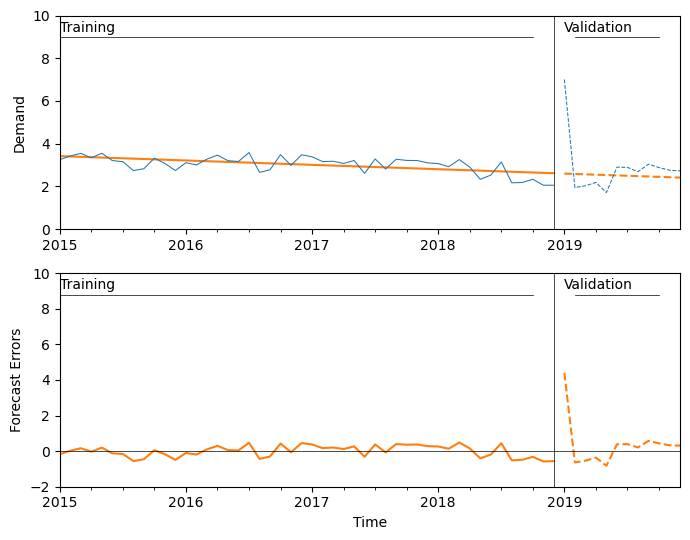

In [41]:
def graphLayout(axes, train_df, valid_df):
    singleGraphLayout(axes[0],[0,10], train_df, valid_df)
    singleGraphLayout(axes[1],[-2,10] ,train_df, valid_df)
    train_df.plot(y='Demand', ax=axes[0], color='C0', linewidth=0.75)
    valid_df.plot(y='Demand', ax=axes[0], color='C0', linestyle='dashed',linewidth=0.75)
    axes[1].axhline(y=0, xmin=0, xmax=1, color='black', linewidth=0.5)
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Demand')
    axes[1].set_ylabel('Forecast Errors')
    if axes[0].get_legend():
        axes[0].get_legend().remove()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 5.5))
demand_lm.predict(train_df).plot(ax=axes[0], color='C1')
demand_lm.predict(valid_df).plot(ax=axes[0], color='C1', linestyle='dashed')
residual = train_df['Demand'] - demand_lm.predict(train_df)
residual.plot(ax=axes[1], color='C1')
residual = valid_df['Demand'] - demand_lm.predict(valid_df)
residual.plot(ax=axes[1], color='C1', linestyle='dashed')
graphLayout(axes, train_df, valid_df)
plt.tight_layout()
plt.show()

In [33]:
demand_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Demand   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     24.55
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           1.02e-05
Time:                        01:37:28   Log-Likelihood:                -13.959
No. Observations:                  48   AIC:                             31.92
Df Residuals:                      46   BIC:                             35.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4317      0.097     35.398      0.000       3.237       3.627
trend         -0.0171      0.003     -4.954      0.000      -0.024      -0.010
==============================================================================
Omnibus:                        8.978   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                3.060
Skew:                          -0.253   Prob(JB):                        0.217
Kurtosis:                       1.872   Cond. No.                         57.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#linear trend
demand_lm_linear = sm.ols(formula='Demand ~ trend', data=train_df).fit()
predict_df_linear = demand_lm_linear.predict(valid_df)
#exponential trend
demand_lm_expo = sm.ols(formula='np.log(Demand) ~ trend', data=train_df).fit()
predict_df_expo = demand_lm_expo.predict(valid_df)
#polynomial trend
demand_lm_poly = sm.ols(formula='Demand ~ trend + np.square(trend)',data=train_df).fit()
predict_df_poly = demand_lm_poly.predict(valid_df)

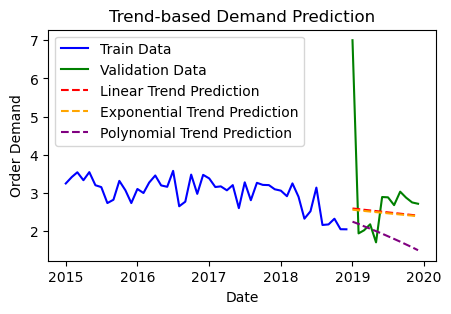

In [47]:
# Plotting the graph
plt.figure(figsize=(5, 3))
plt.plot(train_df.index, train_df['Demand'], label='Train Data', color='blue', linestyle='-')
plt.plot(valid_df.index, valid_df['Demand'], label='Validation Data', color='green', linestyle='-')

# Plot predictions for linear trend
plt.plot(valid_df.index, predict_df_linear, label='Linear Trend Prediction', color='red', linestyle='--')

# Plot predictions for exponential trend
plt.plot(valid_df.index, np.exp(predict_df_expo), label='Exponential Trend Prediction', color='orange', linestyle='--')

# Plot predictions for polynomial trend
plt.plot(valid_df.index, predict_df_poly, label='Polynomial Trend Prediction', color='purple', linestyle='--')

# Add title and labels
plt.title('Trend-based Demand Prediction')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.legend()
plt.show()

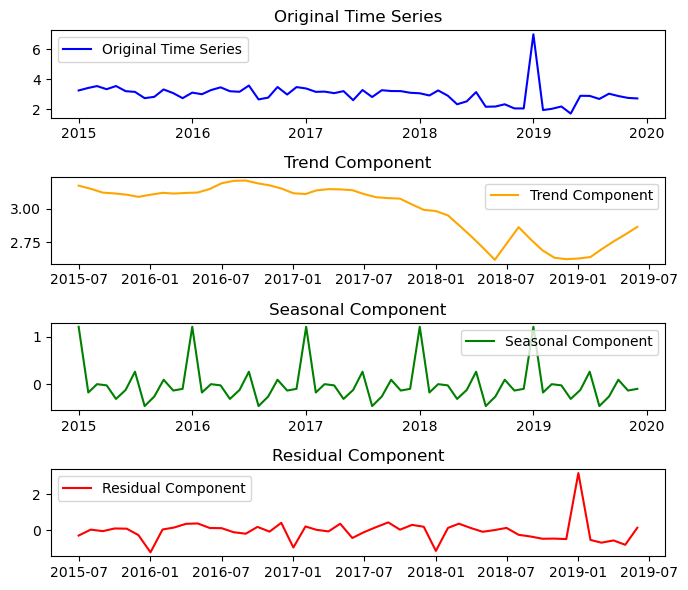

In [43]:
# Decompose the time series into additive components
decomposition = seasonal_decompose(demand_ts, model='additive', period=12)
# Set a larger figure size for better visualization
plt.figure(figsize=(7, 6))

# Original time series
plt.subplot(411)
plt.plot(decomposition.observed, color='blue', label='Original Time Series')
plt.title('Original Time Series')
plt.legend()
# Trend component
plt.subplot(412)
plt.plot(decomposition.trend, color='orange', label='Trend Component')
plt.title('Trend Component')
plt.legend()
# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, color='green', label='Seasonal Component')
plt.title('Seasonal Component')
plt.legend()
# Residual/Noise component
plt.subplot(414)
plt.plot(decomposition.resid, color='red', label='Residual Component')
plt.title('Residual Component')
plt.legend()
# Adjusting layout for better spacing
plt.tight_layout()
plt.show()


In [37]:
# Ensure 'Month' is correctly defined in the DataFrame
demand_df['Month'] = demand_df.index.month
nTrain = int(len(demand_df) * 0.8)  # 80% of the data for training
# Partition the data
train_df = demand_df[:nTrain]
valid_df = demand_df[nTrain:]

# Fit the regression model with seasonality
demand_lm_season = sm.ols(formula='Demand ~ C(Month)', data=train_df).fit()

# Display the summary of the model
print(demand_lm_season.summary())

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     1.402
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.214
Time:                        01:37:43   Log-Likelihood:                -15.664
No. Observations:                  48   AIC:                             55.33
Df Residuals:                      36   BIC:                             77.78
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.2000      0.194     16.

In [39]:
# Build a model with seasonality, trend, and quadratic trend
formula = 'Demand ~ trend + np.square(trend) + C(Month)'
demand_lm_trendseason = sm.ols(formula=formula, data=train_df).fit()


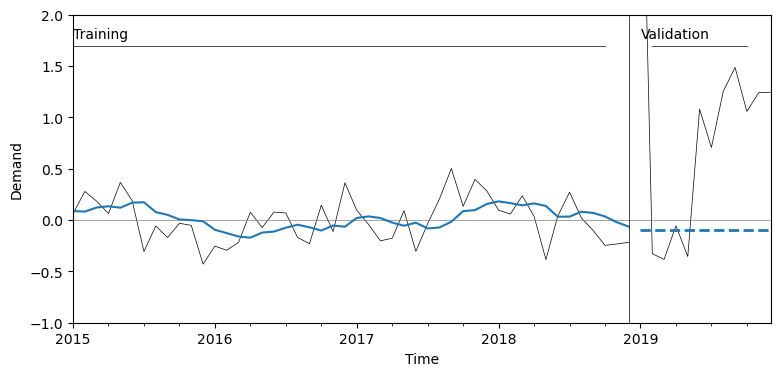

In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
residuals_ts = demand_lm_trendseason.resid
residuals_ts.index = train_df.index
residuals_pred = valid_df.Demand - demand_lm_trendseason.predict(valid_df)
# Plotting
fig, ax = plt.subplots(figsize=(9,4))
residuals_ts.plot(ax=ax, color='black', linewidth=0.5)
residuals_pred.plot(ax=ax, color='black', linewidth=0.5)
ax.set_ylabel('Demand')
ax.set_xlabel('Time')
ax.axhline(y=0, color='grey', linewidth=0.5)

# Run exponential smoothing
expSmooth = ExponentialSmoothing(residuals_ts, freq='MS')  
expSmoothFit = expSmooth.fit(smoothing_level=0.2)
expSmoothFit.fittedvalues.plot(ax=ax)
expSmoothFit.forecast(len(valid_df)).plot(ax=ax, style='--', linewidth=2, color='C0')

singleGraphLayout(ax, [-1,2], train_df, valid_df)

# Set x-axis limits to zoom into the desired time period (from 2014 to 2019)
ax.set_xlim(pd.Timestamp('2015-01-01'), pd.Timestamp('2019-12-31'))

plt.show()

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
valid_demand_trimmed = valid_df['Demand'].iloc[:len(expSmoothFit.fittedvalues)]
exp_smooth_predictions = expSmoothFit.fittedvalues.iloc[:len(valid_df)]
# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(valid_demand_trimmed, exp_smooth_predictions)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 2.808075682402189
